# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: 19
* Students: Zahra Farsijani, Joëlle Hanna, Dorsan Lepour, Amin Mekacher
* Dataset: Terrorist Relations

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [2]:
import numpy as np
import pandas as pd

adjacency = np.load('adjacency_matrix.npy')# the adjacency matrix
n_nodes = len(adjacency) # the number of nodes in the network
n_edges = len(pd.read_csv("TerroristRel.edges", header = None, sep="\t", encoding="utf-8")) # the number of edges in the network
Lmax = n_nodes * (n_nodes - 1) / 2
avg_degree = 19 # the exact value computed in the first milestone was 19.262044653349

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

Text(0.5, 1.05, 'Original data set')

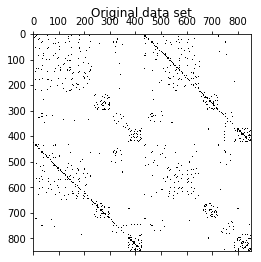

In [3]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
import scipy

plt.spy(adjacency)
plt.title('Original data set')

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    random.seed(seed)
    adjacency = np.zeros((n,n))
    for i in range(0,n-1):
        for j in range(i+1,n):
            r = random.uniform(0, 1)
            if r<p:
                adjacency[i,j] = 1
                adjacency[j,i] = 1
   
    # Your code here.
    
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

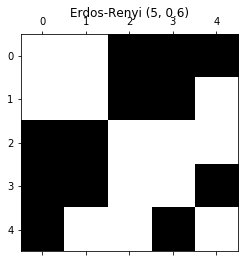

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

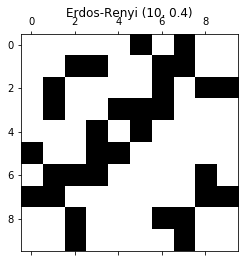

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Text(0.5, 1.05, 'Erdos-Renyi (851,0.023756134651275317)')

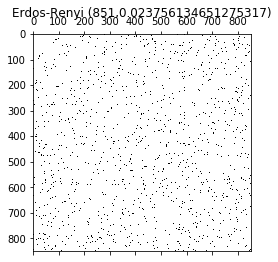

In [6]:
p = n_edges / Lmax;
erdos = erdos_renyi(n_nodes, p, None)
edges_erdos = (np.sum(np.sum(erdos))) / 2
plt.spy(erdos)
plt.title('Erdos-Renyi ('+str(n_nodes)+','+str(p)+')')

For a similar number of nodes (~800) and edges (~8000), we can observe that the graph obtained with a Erdos-Renyi formation process is completely different. The adjacency matrix is typical of a random graph : very few disconnected nodes, and no hubs at all. Also, we know that for an Erdos-Renyi graph, a small change in p results in an exponential change in the size of the largest connected component. Here we have np = 20 > 1, which guarantees the existence of a unique giant component.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [7]:
def barabasi_albert(n, m, mo=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    random.seed(seed)
    adjacency = np.zeros((n, n))
    temp_adjacency = np.zeros((n, n))
    
    if mo < m:
        mo = m
    
    if mo != 1:
        for i in range(0, mo):
            new_nodes = 0
            while (new_nodes == 0):
                for j in range(0, mo):
                    r = random.uniform(0, 1)

                    if (r < 0.9 and i != j):
                        adjacency[i, j] = 1
                        adjacency[j, i] = 1
                        new_nodes = new_nodes + 1
                        
    else: # we generate a first edge between the two first points
        adjacency[0, 1] = 1
        adjacency[1, 0] = 1
    
    for i in range(m, n):
        new_nodes = 0
        
        while (new_nodes < m):
            for j in range(0, i):
                p = np.sum(adjacency, 1)[j] / np.sum(adjacency)
                r = random.uniform(0, 1)

                if (r < p and new_nodes != m and temp_adjacency[i, j] == 0):
                    temp_adjacency[i, j] = 1
                    temp_adjacency[j, i] = 1
                    new_nodes = new_nodes + 1

            if (new_nodes == m):
                adjacency = (np.logical_or(adjacency, temp_adjacency)).astype(int)
                
    
    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

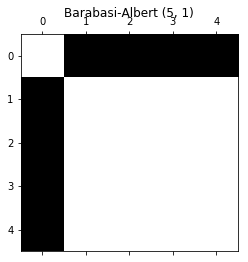

In [8]:
ba = barabasi_albert(5, 1, 1, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)') 

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

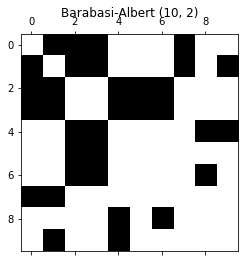

In [9]:
ba = barabasi_albert(10, 2, 2, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Text(0.5, 1.05, 'Barabasi-Albert (851,9.5,9.5)')

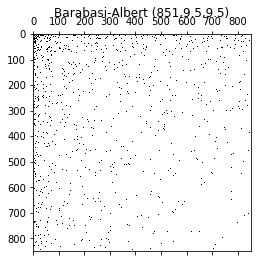

In [11]:
barabasi = barabasi_albert(n_nodes, int(avg_degree / 2), int(avg_degree / 2), 9087)
plt.spy(barabasi)
plt.title('Barabasi-Albert ('+str(n_nodes)+','+str(avg_degree / 2)+','+str(avg_degree / 2)+')')

**We chose to use half of the average degree of our real network as the number of edges to attach from a new node to existing nodes, in order to have a good simulation of our network with regards to its properties**

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [12]:
print("Number of edges: \n" 
      "Real network:", n_edges, "\n" 
      "Erdös-Renyi network: ", np.sum(np.sum(erdos)) / 2, "\n" 
      "Barábasi-Albert network: ", np.sum(np.sum(barabasi)) / 2)

Number of edges: 
Real network: 8592 
Erdös-Renyi network:  8653.0 
Barábasi-Albert network:  7614.0


In [ ]:
**We can see that the Erdös-Renyi model generates a more accurate simulation of our 
real network than the Barábasi-Albert one** 

### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [15]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    kl = 0
    for i in range (0,len(p)):
        if p[i] == 0:
            kl = kl + 0
        elif p[i] != 0 and q[i] == 0:
            break;
        else:
            kl = kl + p[i]*np.log(p[i]/q[i])   
    return kl

In [16]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [17]:
p = (sum(adjacency)/len(adjacency))
q = (sum(erdos)/len(erdos))
r = (sum(barabasi) / len(barabasi))
kl_erdos = kl_divergence(p, q)
kl_barabasi = kl_divergence(p, r)
print("KL Erdös-Renyi: ", kl_erdos, "\nKL_Barábasi-Albert: ", kl_barabasi)

KL Erdös-Renyi:  2.2400857366763924 
KL_Barábasi-Albert:  8.049766960153407


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

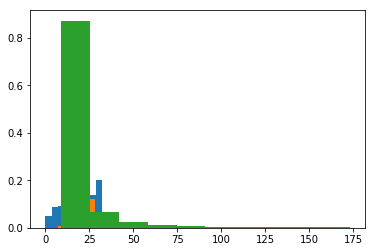

In [18]:
weights_adj = np.ones_like(p) / float(n_nodes)
plt.hist(p*len(p), weights=weights_adj);
weights_erdos = np.ones_like(q) / float(n_nodes)
plt.hist(q*len(q), weights=weights_erdos);
weights_barabasi = np.ones_like(r) / float(n_nodes)
plt.hist(r*len(r), weights=weights_barabasi);

**Yes, because we can see that the degree distribution of our network (in blue) is much more similar to the Erdös-Renyi network (in orange) than the Barábasi-Albert network (in green). This is due to the fact that the preferential attachment for the Barábasi-Albert model means that the first nodes in the network keep getting more connected than the more recent ones as new nodes are added to the network (the richs get richer).**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**No, because the degree distribution of a network does not give any information concerning how the nodes are connected to each other (where the hubs are located, is it a connected network, etc...) **

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits your network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**We decided to choose the Watts-Strogatz model, because it takes into account the clustering phenomenon and the small world property (i.e. it reconciles the high clustering and short average paths), and we expect to see these characteristics in a social network as the one we are analyzing.**

### Question 11

Explain (in short) how the chosen model works.

**The model creates a circle network in which each node is initially only connected to k nodes (with k the average degree we computed in the first milestone). Then, each link is rewired with a probability p, which increases the randomness of the graph and decreases the short path lengths.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

/Users/aminmekacher/miniconda3/envs/ntds_project/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


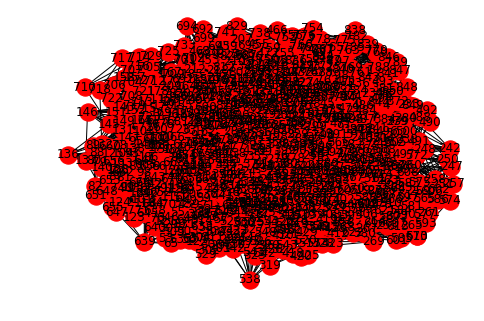

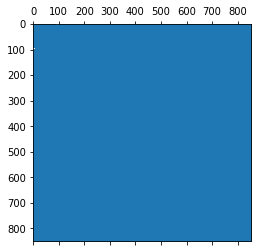

In [19]:
import networkx as nx 
import matplotlib.pyplot as plt 

ws = nx.watts_strogatz_graph(n_nodes, 19, 0.3, 8709)
nx.draw(ws, with_labels=True)
plt.show()
ws_adj = nx.adjacency_matrix(ws)
plt.spy(ws_adj)

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [23]:
giant_ws = max(nx.connected_component_subgraphs(ws), key=len)
dia_ws = nx.diameter(giant_ws)

print("Diameter of the Watts-Strogatz Network: ", dia_ws)

Diameter of the Watts-Strogatz Network:  4


Are the results what you expected? Explain.

**We get a very short length, with only 4 nodes between the two most distant nodes of the giant component. In our case, the diameter is equal to 14 (cf first milestone), which shows that the Watts-Strogatz indeed implements the small world property.**